# Decision Trees
## Exercise 1 
Ternary classification

The following code creates a small dataset with two attributes and a target
variable with three possible values:

In [1]:
import pandas as pd
X = pd.DataFrame({'X1': [1, 1, 1, 1, 0, 0],
                  'X2': [1, 1, 1, 0, 0, 0]})
Y = pd.Series([1, 1, 2, 3, 2, 3])

1. Calculate the information gain for `X1` and `X2` relative to `Y`.
1. Based on these calculations, what attribute will be used for the first node of the ID3 tree?
1. Learn the entire tree and classify the instance `{'X1': 0, 'X2': 1}`.

## Exercise 2
ID3 as a "greedy" algorithm

The following code creates a dataset with features `A, B, C` and target variable `Y`:

In [9]:
import pandas as pd
X = pd.DataFrame({'A': [1, 1, 0, 0],
                  'B': [1, 0, 1, 0],
                  'C': [0, 1, 1, 1]})
Y = pd.Series([0, 1, 1, 0])

from math import log2
print( 2/3 + 1/3 * ( 1/3*log2(3) + 2/3 * log2(3/2)) )

0.972765278018163


1. Find the decision tree using ID3. Is it _consistent_ with the training data (does it have 100% accuracy)?
1. Is there a less deep decision tree consistent with the above data? If so, what logic concept does it represent?

## Exercise 3

Titanic dataset

The table bellow shows a few statistics on the survivors of the Titanic:

In [24]:
from scipy.stats import entropy
import pandas as pd
titanic = pd.DataFrame([
  ('Upper', 'Male', 'Child', 5, 5),
  ('Upper', 'Male', 'Adult', 175, 57),
  ('Upper', 'Female', 'Child', 1, 1),
  ('Upper', 'Female', 'Adult', 144, 140),
  ('Lower', 'Male', 'Child', 59, 24),
  ('Lower', 'Male', 'Adult', 1492, 281),
  ('Lower', 'Female', 'Child', 44, 27),
  ('Lower', 'Female', 'Adult', 281, 176)
],
columns=['Class', 'Gender', 'Age', 'Passengers', 'Survivors'])
print(titanic)

# ex1
count_survived = sum(titanic['Survivors'])
count_total = sum(titanic['Passengers'])
h_survivors = entropy([count_survived/count_total, 1 - (count_survived/count_total)], base = 2)
print(f"H(Y) = {h_survivors}")

# class 
upper_survived = 0
upper_total = 0
for index, row in titanic.iterrows():
  if row['Class'] == 'Upper':
    upper_survived += row['Survivors']
    upper_total += row['Passengers']

inf_survived = count_survived - upper_survived
inf_total = count_total - upper_total

h_survived_class = upper_total/count_total * entropy([upper_survived/upper_total, 1 - (upper_survived/upper_total)], base = 2) + inf_total/count_total * entropy([inf_survived/inf_total, 1 - (inf_survived/inf_total)], base = 2)
print(f"IG(Y,C) = {h_survivors - h_survived_class}")


# gender
male_survived = 0
male_total = 0
for index, row in titanic.iterrows():
  if row['Gender'] == 'Male':
    male_survived += row['Survivors']
    male_total += row['Passengers']

female_survived = count_survived - male_survived
female_total = count_total - male_total

h_survived_gender = male_total/count_total * entropy([male_survived/male_total, 1 - (male_survived/male_total)], base = 2) + female_total/count_total * entropy([female_survived/female_total, 1 - (female_survived/female_total)], base = 2)
print(f"IG(Y,G) = {h_survivors - h_survived_gender}")


# age
adult_survived = 0
adult_total = 0
for index, row in titanic.iterrows():
  if row['Age'] == 'Adult':
    adult_survived += row['Survivors']
    adult_total += row['Passengers']

child_survived = count_survived - adult_survived
child_total = count_total - adult_total

h_survived_age = adult_total/count_total * entropy([adult_survived/adult_total, 1 - (adult_survived/adult_total)], base = 2) + child_total/count_total * entropy([child_survived/child_total, 1 - (child_survived/child_total)], base = 2)
print(f"IG(Y,A) = {h_survivors - h_survived_age}")

# alagem ca nod radacina atributul gender, ne ofera cel mai mare castig de informatie

# ex2 - training accuracy after root node
print( f"Training accuracy root node = {(male_total/count_total) * (max(male_survived, male_total - male_survived)/male_total) + (female_total/count_total) * (max(female_survived, female_total - female_survived)/female_total)}" )

# ex3 
# la aceste date vom avea 8 noduri frunza
# pentru fiecare frunza, decizia este oferita de catre max(survivor, dead)
majority = 0
for index, row in titanic.iterrows():
  majority += max(row['Survivors'], row['Passengers'] - row['Survivors'])
print(f"Training accuracy full tree = {majority/count_total}")

   Class  Gender    Age  Passengers  Survivors
0  Upper    Male  Child           5          5
1  Upper    Male  Adult         175         57
2  Upper  Female  Child           1          1
3  Upper  Female  Adult         144        140
4  Lower    Male  Child          59         24
5  Lower    Male  Adult        1492        281
6  Lower  Female  Child          44         27
7  Lower  Female  Adult         281        176
H(Y) = 0.9076514058796559
IG(Y,C) = 0.04850096629035283
IG(Y,G) = 0.1423911945492332
IG(Y,A) = 0.006410718332584997
Training accuracy root node = 0.7760109041344844
Training accuracy full tree = 0.7782825988187188


1. We want to build a decision tree to predict the target variable `Y` (survived) based on variables `C` (class), `G` (gender) and `A` (age). Using information gain, determine which of the three variables will be used in the root node.
2. What is the training accuracy of the decision tree consisting only of the root node above?
3. If you were to build the full tree using all attributes, what would be the training accuracy? Note that you don’t have to actually build the full tree!

## Exercise 4
Exoplanets, one-hot encoding

Given a dataset with data regarding 800 exoplanets, fit a decision tree to find how well `Size` and `Orbit` describe if a planet is habitable. In other words, find the training accuracy of a decision tree model that uses those two variables to predict `Habitable` and also print the resulting tree.

      Size Orbit Habitable
0      Big  Near       Yes
1      Big  Near       Yes
2      Big  Near       Yes
3      Big  Near       Yes
4      Big  Near       Yes
..     ...   ...       ...
795  Small   Far        No
796  Small   Far        No
797  Small   Far        No
798  Small   Far        No
799  Small   Far        No

[800 rows x 3 columns]


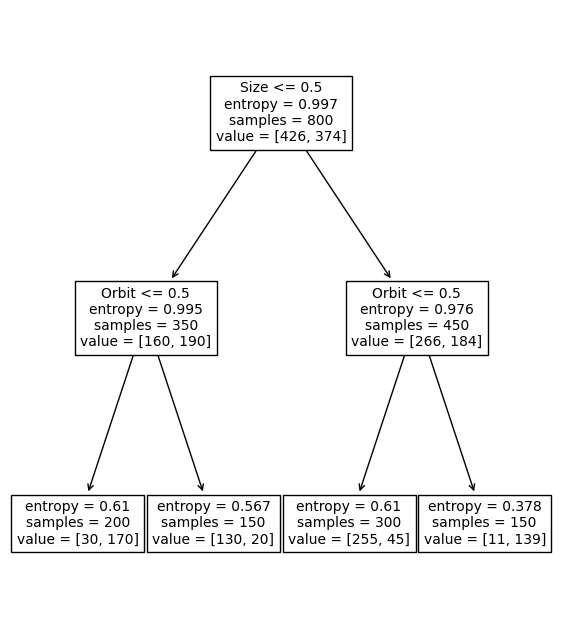

0.8675


In [11]:
from tools.pd_helpers import apply_counts
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

exoplanets = pd.DataFrame([
  ('Big', 'Near', 'Yes', 20),
  ('Big', 'Far', 'Yes', 170),
  ('Small', 'Near', 'Yes', 139),
  ('Small', 'Far', 'Yes', 45),
  ('Big', 'Near', 'No', 130),
  ('Big', 'Far', 'No', 30),
  ('Small', 'Near', 'No', 11),
  ('Small', 'Far', 'No', 255)
],
columns=['Size', 'Orbit', 'Habitable', 'Count'])
exoplanets = apply_counts(exoplanets, 'Count')
print(exoplanets)

cat_features = exoplanets[['Size']] 
ordinal_encoding = OrdinalEncoder().fit_transform(cat_features) # 0 = big, 1 = small
exoplanets[['Size']] = ordinal_encoding

cat_features = exoplanets[['Orbit']] 
ordinal_encoding = OrdinalEncoder().fit_transform(cat_features) # 0 = far, 1 = near
exoplanets[['Orbit']] = ordinal_encoding

cat_features = exoplanets[['Habitable']] 
ordinal_encoding = OrdinalEncoder().fit_transform(cat_features) # 0 = no, 1 = yes
exoplanets[['Habitable']] = ordinal_encoding

X = exoplanets[['Size', 'Orbit']]
y = exoplanets[['Habitable']]

dt_exoplanets = tree.DecisionTreeClassifier(criterion='entropy').fit(X,y)
fig, ax = plt.subplots(figsize=(7, 8))
f = tree.plot_tree(dt_exoplanets, ax=ax, fontsize=10, feature_names=X.columns)
plt.show()

print(dt_exoplanets.score(X,y))

## Exercise 5

Exoplanets, continuous variable

Given a dataset with 9 exoplanets for which we know the `Temperature` as well as the target variable `Habitable`.

1. Find the training accuracy of a decision tree that predicts `Habitable` using `Temperature` and print the resulting tree.
1. Independently calculate the split points that the algorithm will use for `Temperature` and check it against the generated tree. (The solution does not need to be general, can be "hard-coded" for this dataset.)
1. Independently calculate the entropy of the root node of the generated tree.

   Temperature  Habitable
0          205          0
1          205          0
2          260          1
3          380          1
4          205          0
5          260          1
6          260          1
7          380          0
8          380          0
Training accuracy: 0.8888888888888888
Diferenta semn intre 205:0 si 260:1. Breaking point: 232.5
Diferenta semn intre 260:1 si 380:0. Breaking point: 320.0
Diferenta semn intre 380:0 si 380:1. Breaking point: 380.0


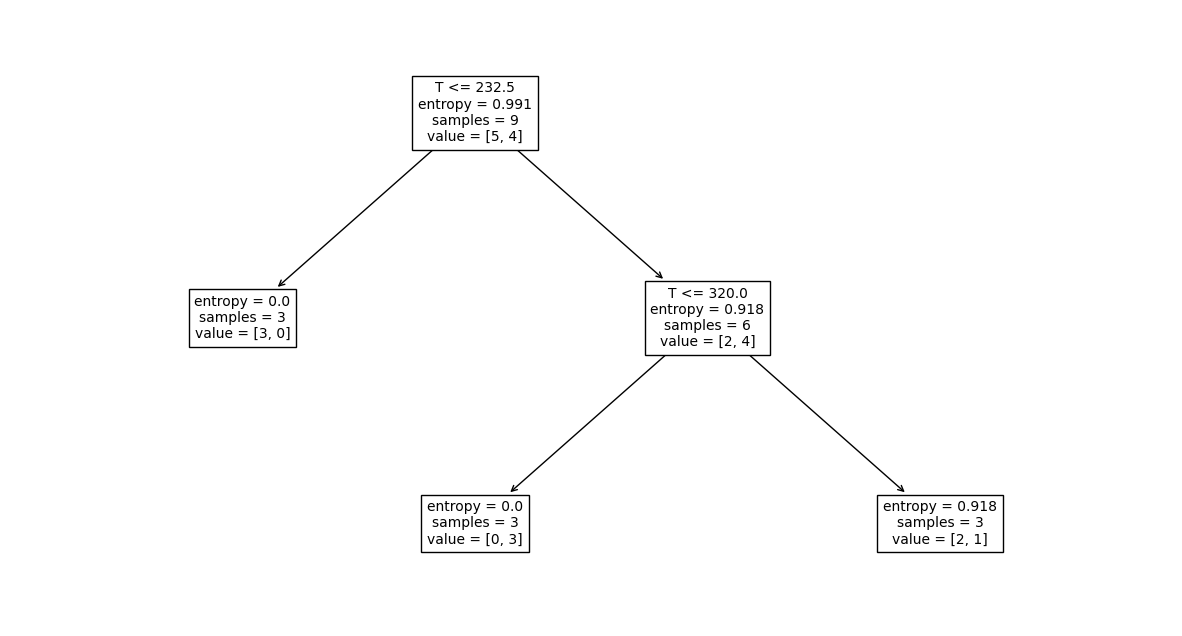

In [58]:
exoplanets = pd.DataFrame([
  (205, 0),
  (205, 0),
  (260, 1),
  (380, 1),
  (205, 0),
  (260, 1),
  (260, 1),
  (380, 0),
  (380, 0)
],
columns=['Temperature', 'Habitable'])
print(exoplanets)

X = exoplanets[['Temperature']]
y = exoplanets[['Habitable']]

dt = tree.DecisionTreeClassifier(criterion = "entropy").fit(X,y)
fig, ax = plt.subplots(figsize=(15, 8))
f = tree.plot_tree(dt, ax=ax, fontsize=10, feature_names='Temperature')

print(f"Training accuracy: {dt.score(X,y)}")

temps = list()
for index in range(len(exoplanets)):
  temps.append(( exoplanets['Temperature'][index], exoplanets['Habitable'][index]))

temps = sorted(temps, key = lambda x: (x[0], x[1]))
prev = temps[0]
for temp in temps:
  if temp[1] != prev[1]:
    print(f"Diferenta semn intre {prev[0]}:{prev[1]} si {temp[0]}:{temp[1]}. Breaking point: {(temp[0]+prev[0])/2}")
  prev = temp

plt.show()